In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Charger les données CSV

data = pd.read_csv('cars.csv', names=['model', 'description'])

df = pd.DataFrame(data)

# Séparation des features et labels
X = df['description']
y = df['model']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Vectorisation des descriptions (conversion des textes en vecteurs de mots)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

Entraînement du modèle

In [15]:
# Entraîner le modèle GaussianNB
model = GaussianNB()
model.fit(X_train_vec, y_train)

GaussianNB()

Évaluation du modèle

In [16]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test_vec)

# Afficher le rapport de classification (précision, rappel, F1-score)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         500       0.56      0.71      0.63        21
       astra       0.33      0.50      0.40         6
       corsa       0.21      0.18      0.20        22
      fiesta       0.12      0.08      0.10        12
       focus       0.35      0.50      0.41        18
        golf       0.20      0.12      0.15         8
       model       0.00      0.00      0.00         1
        polo       0.47      0.33      0.39        21

    accuracy                           0.37       109
   macro avg       0.28      0.30      0.28       109
weighted avg       0.34      0.37      0.35       109



c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Amélioration de la classification bayésienne par préprocessing
(il faudrait tester avec plus de donner qualifier et d'autrre nettoyage)

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
 
# Télécharger le tokenizer 'punkt' et les stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...


True

In [33]:
# Fonction de prétraitement avec NLTK
# Fonction de prétraitement avec NLTK
def preprocess_text(text):
    # Tokenisation
    tokens = word_tokenize(text.lower())

    # Suppression des stopwords et de la ponctuation
    stop_words = set(stopwords.words('english'))
    tokens = [
        word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Suppression des tokens numériques et des mots trop courts
    tokens = [word for word in tokens if word.isalpha() and len(word) > 2]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [34]:
df['description'] = df['description'].apply(preprocess_text)

In [35]:

# Séparation des features et labels
X = df['description']
y = df['model']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Vectorisation des descriptions (conversion des textes en vecteurs de mots)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Entraîner le modèle GaussianNB
model = GaussianNB()
model.fit(X_train_vec, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test_vec)

# Afficher le rapport de classification (précision, rappel, F1-score)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         500       0.56      0.71      0.63        21
       astra       0.00      0.00      0.00         6
       corsa       0.35      0.32      0.33        22
      fiesta       0.20      0.33      0.25        12
       focus       0.53      0.50      0.51        18
        golf       0.14      0.12      0.13         8
       model       0.00      0.00      0.00         1
        polo       0.36      0.24      0.29        21

    accuracy                           0.38       109
   macro avg       0.27      0.28      0.27       109
weighted avg       0.37      0.38      0.36       109



c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# la matrice est basé sur les données de test (et non de train)


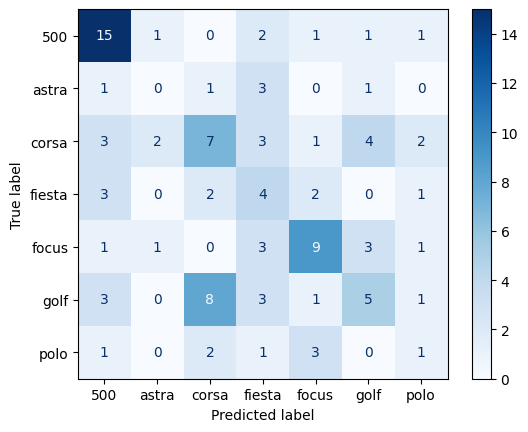

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Toutes les classes possibles (assurez-vous que ces classes sont bien présentes dans votre jeu de données)
class_labels = ["500", "astra", "corsa", "fiesta", "focus", "polo", "golf"]


# Calculer et afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()